In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
#mouse_drug_data_to_load = "c:\\Resources\\mouse_drug_data.csv"
#clinical_trial_data_to_load = "c:\\Resources\\clinicaltrial_data.csv"
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinic_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_data, clinic_data, how="outer",on="Mouse ID" )
merge_data_df = merge_data[(merge_data["Drug"]  == 'Capomulin') |
                      (merge_data["Drug"]  == 'Infubinol') |
                      (merge_data["Drug"]  == 'Ketapril') |
                      (merge_data["Drug"]  == 'Placebo')]


# Display the data table for preview
merge_data_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = merge_data_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_mean = pd.DataFrame({
    "Tumor Volume (mm3)" :tumor_mean})
tumor_mean = tumor_mean.reset_index()
# Preview DataFrame
tumor_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = merge_data_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_error_df = pd.DataFrame({
    "Tumor Volume (mm3)" : tumor_error})
tumor_error_df = tumor_error_df.reset_index()
# Preview DataFrame
tumor_error_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_reformat = tumor_mean.reset_index()
tumor_mean_pivot = tumor_mean_reformat.pivot(index='Timepoint', columns='Drug', values ='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_mean_reformat.head()

,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,Capomulin,0,45.000000
1,1,Capomulin,5,44.266086
2,2,Capomulin,10,43.084291
3,3,Capomulin,15,42.064317
4,4,Capomulin,20,40.716325


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


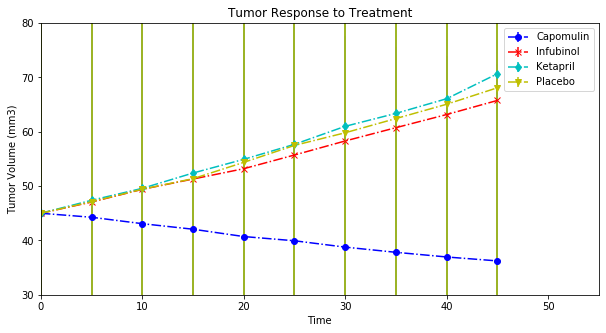

In [5]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,5))
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Capomulin"], yerr=tumor_mean_pivot["Capomulin"], 
             color="b", fmt="o",linestyle = "-.")
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Infubinol"], yerr=tumor_mean_pivot["Infubinol"],
             color="r", fmt="x",linestyle = "-.")
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Ketapril"], yerr=tumor_mean_pivot["Ketapril"],
             color="c", fmt="d",linestyle = "-.")
plt.errorbar(tumor_mean_pivot.index, tumor_mean_pivot["Placebo"], yerr=tumor_mean_pivot["Placebo"],
             color="y", fmt="v",linestyle = "-.")
plt.xlim(0,55)
plt.ylim(30,80)

#set title
plt.title("Tumor Response to Treatment")
#set text for the x axis
plt.xlabel("Time") 
#set text for the y axis
plt.ylabel("Tumor Volume (mm3)") 
#set legend
plt.legend(tumor_mean_pivot, loc="best", fontsize=10, fancybox=True)
# Save the Figure
#plt.savefig("c:\\Resources\\Tumor Response to Treatment.png")
plt.savefig("../Images/Tumor Response to Treatment.png)


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = merge_data_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
metastatic_mean = pd.DataFrame({
    "Metastatic Sites" :metastatic_mean})
# Preview DataFrame
metastatic_mean

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
Ketapril  0                  0.000000
          5                  0.304348
          10                 0.590909
          15                 0.842105
          20                 1.210526
          25                 1.631579
          30                 2.055556
          35                 2.294118
          40                 2.733333
          45                 3.363636
Placebo   0                  0.000000
          5                  0.375000
          10                 0.833333
          15                 1.250000
          20                 1.526316
          25                 1.941176
          30                 2.266667
          35                 2.642857
          40                 3.166667
          45                 3.272727

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_error = merge_data_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
metastatic_error_df = pd.DataFrame({
    "Metastatic Sites" :metastatic_error})
# Preview DataFrame
metastatic_error_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
Ketapril  0                  0.000000
          5                  0.098100
          10                 0.142018
          15                 0.191381
          20                 0.236680
          25                 0.288275
          30                 0.347467
          35                 0.361418
          40                 0.315725
          45                 0.278722
Placebo   0                  0.000000
          5                  0.100947
          10                 0.115261
          15                 0.190221
          20                 0.234064
          25                 0.263888
          30                 0.300264
          35                 0.341412
          40                 0.297294
          45                 0.304240

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_reformat = metastatic_mean.reset_index()
metastatic_mean_pivot = metastatic_mean_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
# Preview that Reformatting worked
metastatic_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,5))
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Capomulin"], yerr=metastatic_mean_pivot["Capomulin"], 
             color="b", fmt="o",linestyle = "-.")
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Infubinol"], yerr=metastatic_mean_pivot["Infubinol"],
             color="r", fmt="x",linestyle = "-.")
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Ketapril"], yerr=metastatic_mean_pivot["Ketapril"],
             color="c", fmt="d",linestyle = "-.")
plt.errorbar(metastatic_mean_pivot.index, metastatic_mean_pivot["Placebo"], yerr=metastatic_mean_pivot["Placebo"],
             color="y", fmt="v",linestyle = "-.")

plt.xlim(0,55)
plt.ylim(0,7)

#set title
plt.title("Metastatic Spread During Treatment")
#set text for the x axis
plt.xlabel("Treatment Duration (Days)") 
#set text for the y axis
plt.ylabel("Metastatic Sites") 
#set legend
plt.legend(metastatic_mean_pivot, loc="best", fontsize="small", fancybox=True )
# Save the Figure
#plt.savefig("c:\\Resources\\Metastatic Response to Treatment.png")
plt.savefig("../Images/Metastatic Response to Treatment.png)
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = merge_data_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
# Convert to DataFrame
mouse_count_df =  pd.DataFrame({
    "Mouse Count" : mouse_count})
# Preview DataFrame
mouse_count_df

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9
Ketapril  0                   25
          5                   23
          10                  22
          15                  19
          20                  19
          25                  19
          30                  18
          35                  17
          40                  15
          45                  11
Placebo   0                   25
          5                   24
          10                  24
          15                  20
          20                  19
          25                  17
          30                  15
          35                  14
          40                  12
          45                  11

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mouse_mean_reformat = mouse_count.reset_index()
mouse_mean_pivot = mouse_mean_reformat.pivot(index='Timepoint', columns='Drug')['Mouse ID']
# Preview the Data Frame
mouse_mean_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


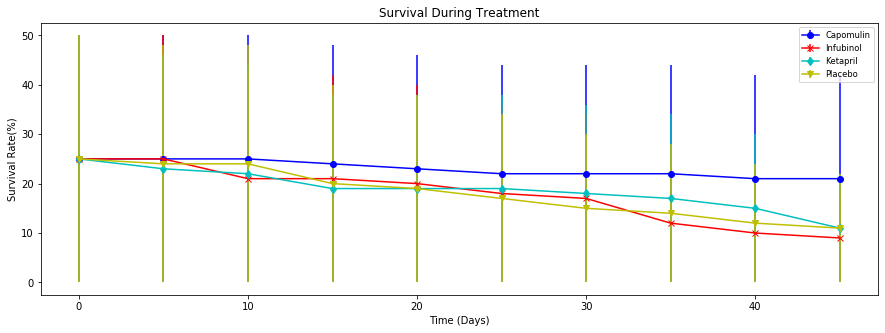

In [12]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(15,5))
plt.errorbar(mouse_mean_pivot.index, mouse_mean_pivot["Capomulin"], yerr=mouse_mean_pivot["Capomulin"], 
             color="b", fmt="o",linestyle = "-")
plt.errorbar(mouse_mean_pivot.index, mouse_mean_pivot["Infubinol"], yerr=mouse_mean_pivot["Infubinol"],
             color="r", fmt="x",linestyle = "-")
plt.errorbar(mouse_mean_pivot.index, mouse_mean_pivot["Ketapril"], yerr=mouse_mean_pivot["Ketapril"],
             color="c", fmt="d",linestyle = "-")
plt.errorbar(mouse_mean_pivot.index, mouse_mean_pivot["Placebo"], yerr=mouse_mean_pivot["Placebo"],
             color="y", fmt="v",linestyle = "-")


# Save the Figure
plt.title("Survival During Treatment")
#set text for the x axis
plt.xlabel("Time (Days)") 
#set text for the y axis
plt.ylabel("Survival Rate(%)") 
#set legend
plt.legend(mouse_mean_pivot, loc="best", fontsize="small", fancybox=True )
# Save the Figure
#plt.savefig("c:\\Resources\\Survival Rates.png")
plt.savefig("../Images/Survival Rates.png)

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)